# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Fatih Bagaskara]
- **Email:** [mfatihbagaskara@gmail.com]
- **ID Dicoding:** [mfatihbagaskara]

## Menentukan Pertanyaan Bisnis

- How the temperature affects bike sharing?
- In which season bike sharing get the highest users?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
#load table day
day_df = pd.read_csv('/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#load table hour
hour_df = pd.read_csv('/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [6]:
# check the data type of each column contained in day_df dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# check for missing values ​​in the day_df dataset
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# check for duplicate data in the day_df dataset
print("Duplication: ", day_df.duplicated().sum())

Duplication:  0


In [9]:
# displays descriptive statistics from the day_df dataset
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# check the data type of each column contained in hour_df dataset
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
# check for missing values ​​in the hour_df dataset
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# check for duplicate data in the hour_df dataset
print("Duplication: ", hour_df.duplicated().sum())

Duplication:  0


In [13]:
# displays descriptive statistics from the day_df dataset
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Clean day_df

In [14]:
# dropping workingday colomn because is already represented by the weekday column
day_df.drop(['workingday'], axis = 1, inplace= True)

In [15]:
# rename day_df columns to make them easier to understand
day_df.rename(columns={'cnt':'total_user', 'casual':'casual_user', 'registered':'registered_user', 'temp':'temperature', 'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'weathersit':'weather',
                     'atemp':'temperature_feel', 'hum':'humidity'
                      }, inplace=True)

In [16]:
# change colomn date data type from object to datetime
day_df['date'] = pd.to_datetime(day_df['date'])

In [17]:
# change data type from int to categorical
columns = ['season', 'month', 'holiday', 'day', 'weather']

for column in columns:
    day_df[column] =  day_df[column].astype("category")

In [18]:
# check for column name again
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   date              731 non-null    datetime64[ns]
 2   season            731 non-null    category      
 3   year              731 non-null    int64         
 4   month             731 non-null    category      
 5   holiday           731 non-null    category      
 6   day               731 non-null    category      
 7   weather           731 non-null    category      
 8   temperature       731 non-null    float64       
 9   temperature_feel  731 non-null    float64       
 10  humidity          731 non-null    float64       
 11  windspeed         731 non-null    float64       
 12  casual_user       731 non-null    int64         
 13  registered_user   731 non-null    int64         
 14  total_user        731 non-

In [19]:
# change season name from number to string for clear information
def season_changes(x):
  if x == 1:
      return 'springer'
  elif x == 2:
      return 'summer'
  elif x == 3:
      return 'fall'
  else:
      return 'winter'

day_df['season'] = day_df['season'].apply(season_changes)
day_df.head()

,instant,date,season,year,month,holiday,day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,0,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
# change year from 0 to 2011 and 1 to 2012
def year_changes(y):
    if y == 0:
        return 2011
    else:
        return 2012

day_df['year'] = day_df['year'].apply(year_changes)
day_df.head()

,instant,date,season,year,month,holiday,day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
# change from only number of the month to name of the month
month_changes = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

day_df['month'] = day_df['month'].map(month_changes)
day_df.head(5)

,instant,date,season,year,month,holiday,day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
# change number of the day to name of the day
day_changes = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

day_df['day'] = day_df['day'].map(day_changes)
day_df.head(5)

,instant,date,season,year,month,holiday,day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,0,monday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,0,tuesday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,0,wednesday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,0,thursday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
# change weather information from number to clear information
def weather_changes(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

day_df['weather'] = day_df['weather'].apply(weather_changes)
day_df.head()

,instant,date,season,year,month,holiday,day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,0,monday,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,0,tuesday,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,0,wednesday,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,0,thursday,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Clean hour_df

In [24]:
# dropping workingday colomn
hour_df.drop(['workingday'], axis = 1, inplace= True)

In [25]:
# rename hour_df columns to make them easier to understand
hour_df.rename(columns={'dteday':'dates', 'yr':'years', 'mnth':'months', 'hr':'hours', 'weekday':'days',
                    'weathersit':'weathers', 'temp':'temperatures', 'atemp':'temperature_feel',
                    'hum':'humidity', 'casual':'casual_user', 'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

In [26]:
# change colomn date data type from object to datetime
hour_df['dates'] = pd.to_datetime(hour_df['dates'])

In [27]:
# change data type from int to categorical
columns = ['season', 'months', 'holiday', 'days', 'weathers']

for column in columns:
    hour_df[column] =  hour_df[column].astype("category")

In [28]:
# check for column name and data type again
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   dates             17379 non-null  datetime64[ns]
 2   season            17379 non-null  category      
 3   years             17379 non-null  int64         
 4   months            17379 non-null  category      
 5   hours             17379 non-null  int64         
 6   holiday           17379 non-null  category      
 7   days              17379 non-null  category      
 8   weathers          17379 non-null  category      
 9   temperatures      17379 non-null  float64       
 10  temperature_feel  17379 non-null  float64       
 11  humidity          17379 non-null  float64       
 12  windspeed         17379 non-null  float64       
 13  casual_user       17379 non-null  int64         
 14  registered_user   1737

In [29]:
# change season name from number to string for clear information
def seasons_changes(x):
  if x == 1:
      return 'springer'
  elif x == 2:
      return 'summer'
  elif x == 3:
      return 'fall'
  else:
      return 'winter'

hour_df['season'] = hour_df['season'].apply(seasons_changes)
hour_df.head()

,instant,dates,season,years,months,hours,holiday,days,weathers,temperatures,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,0,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,0,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,0,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,0,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,0,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
# change hour_df year colomn from 0 to 2011 and 1 to 2012
def years_changes(y):
    if y == 0:
        return 2011
    else:
        return 2012

hour_df['years'] = hour_df['years'].apply(years_changes)
hour_df.head()

,instant,dates,season,years,months,hours,holiday,days,weathers,temperatures,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [31]:
# change month from number to name of the month
months_changes = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

hour_df['months'] = hour_df['months'].map(months_changes)
hour_df.head(5)

,instant,dates,season,years,months,hours,holiday,days,weathers,temperatures,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [32]:
# change day from number to name of the day
days_changes = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

hour_df['days'] = hour_df['days'].map(days_changes)
hour_df.head(5)

,instant,dates,season,years,months,hours,holiday,days,weathers,temperatures,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,0,sunday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,0,sunday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,0,sunday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,0,sunday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,0,sunday,1,0.24,0.2879,0.75,0.0,0,1,1


In [33]:
# change weather from number to name of the weather
def weathers_changes(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

hour_df['weathers'] = hour_df['weathers'].apply(weathers_changes)
hour_df.head()

,instant,dates,season,years,months,hours,holiday,days,weathers,temperatures,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,0,sunday,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,0,sunday,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,0,sunday,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,0,sunday,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,0,sunday,clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore day_df

In [34]:
# explore day_df
day_df.describe(include="all")

,instant,date,season,year,month,holiday,day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731,731.000000,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,january,0.0,monday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Based on the summary of statistical parameters above, we will get the most information about bikesharing in fall 188 times, in January 62 times, on Mondays 105 times, and when the weather is clear 463 times.


explore hour_df

In [35]:
hour_df.describe(include="all")

,instant,dates,season,years,months,hours,holiday,days,weathers,temperatures,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,may,NaN,0.0,sunday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Based on the summary of statistical parameters above, we will obtain information on the number of customers as many as 17,379. Based on the data displayed in the range between 00.00 to 23.59, the average bicycle rental occurs at 11.54

## Visualization & Explanatory Analysis

### Pertanyaan 1: How the temperature affects bike sharing?

In [38]:
# show information about users
print(day_df[['weather', 'casual_user', 'registered_user', 'total_user']].describe(include='all'))

       weather  casual_user  registered_user   total_user
count      731   731.000000       731.000000   731.000000
unique       3          NaN              NaN          NaN
top      clear          NaN              NaN          NaN
freq       463          NaN              NaN          NaN
mean       NaN   848.176471      3656.172367  4504.348837
std        NaN   686.622488      1560.256377  1937.211452
min        NaN     2.000000        20.000000    22.000000
25%        NaN   315.500000      2497.000000  3152.000000
50%        NaN   713.000000      3662.000000  4548.000000
75%        NaN  1096.000000      4776.500000  5956.000000
max        NaN  3410.000000      6946.000000  8714.000000


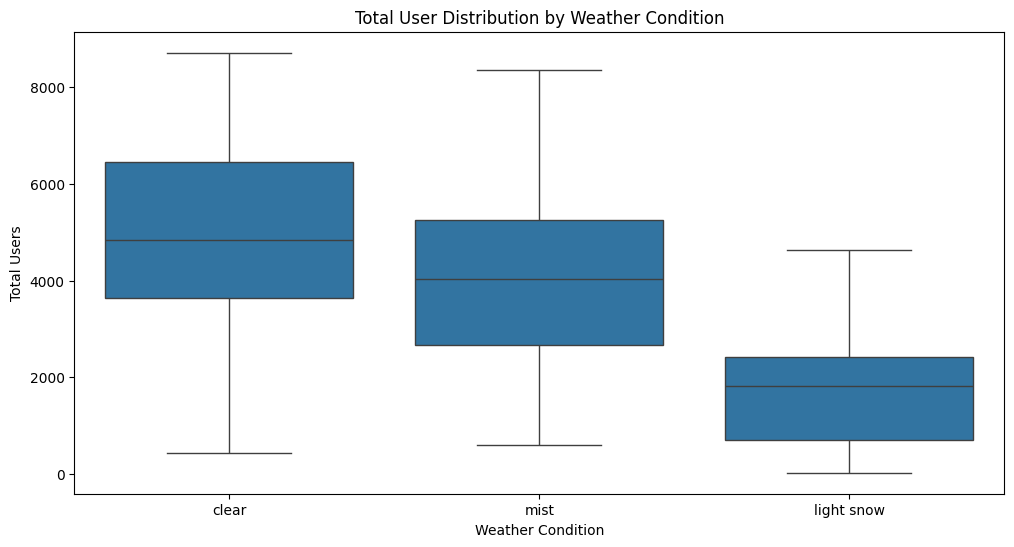

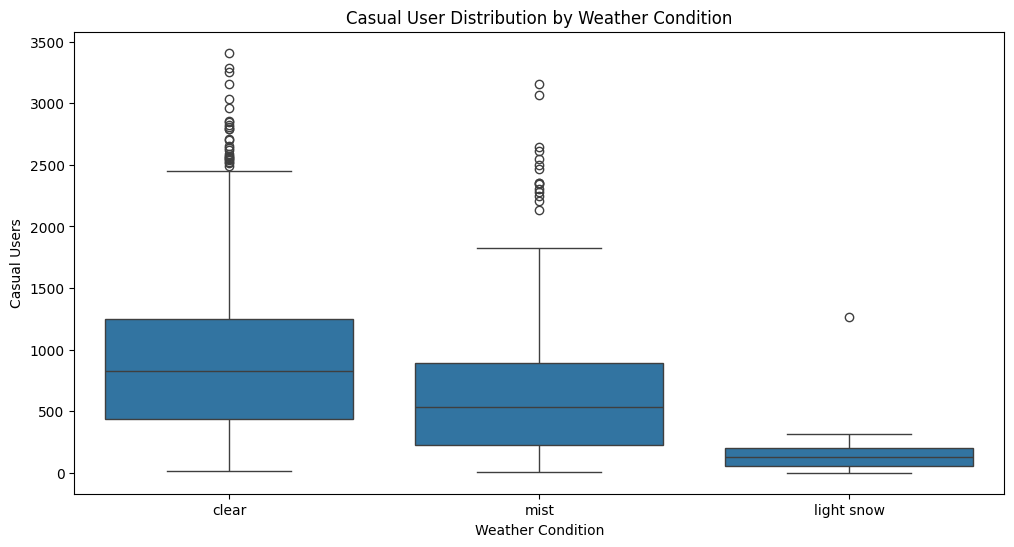

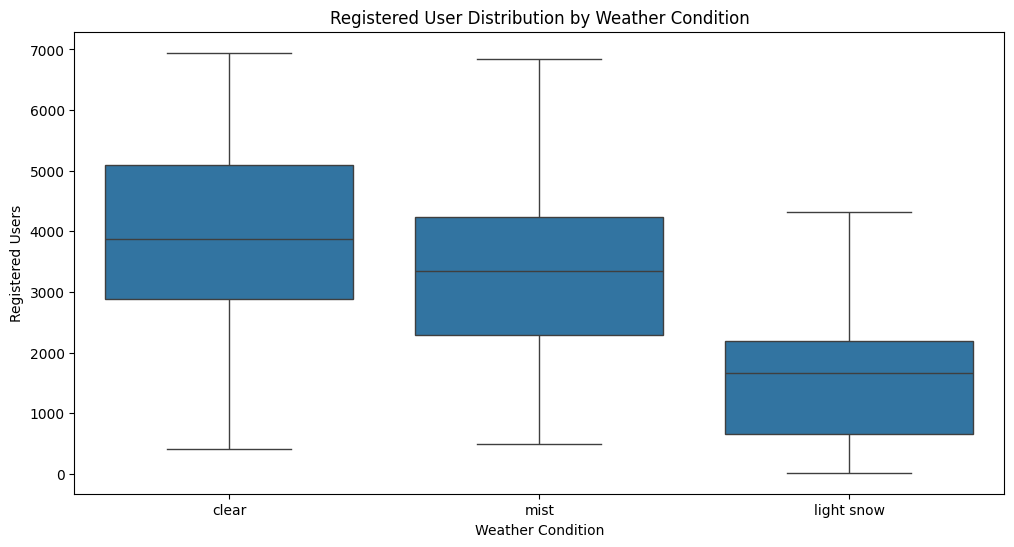

In [39]:
# Create a box plot to see the distribution of the number of users based on weather conditions
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='total_user', data=day_df)
plt.title('Total User Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Users')
plt.show()

# Create a count plot to see the number of casual users based on weather conditions
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='casual_user', data=day_df)
plt.title('Casual User Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Casual Users')
plt.show()

# Create a count plot to see the number of registered users based on weather conditions
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='registered_user', data=day_df)
plt.title('Registered User Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Registered Users')
plt.show()

From the box plot above, we can see the distribution of the total number of bike sharing users based on weather conditions.

- The number of bike sharing users tends to be higher in sunny weather compared to foggy weather and light snow.
- The median number of users in clear weather (around 5000) is higher compared to foggy weather (around 4000) and light snow (around 2000).
- The range of user numbers was also wider on sunny days, indicating greater variation in bicycle use on sunny days.

### Pertanyaan 2: In which season bike sharing get the highest users?

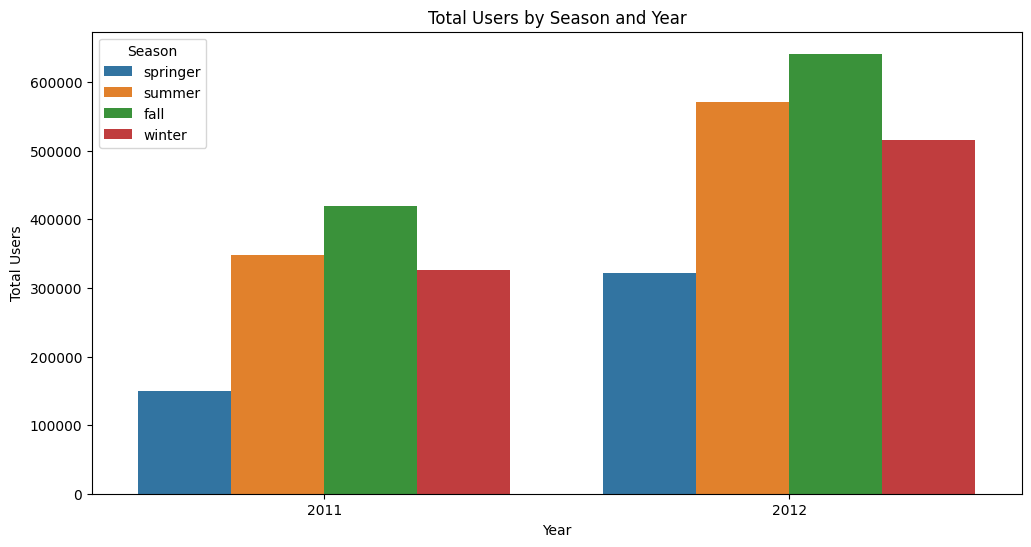

In [40]:
season_year_group = day_df.groupby(['season', 'year']).agg({'total_user': 'sum'}).reset_index()

# Sort data by number of users
season_year_group = season_year_group.sort_values(by='total_user', ascending=False)

# Make plot
plt.figure(figsize=(12, 6))
sns.barplot(data=season_year_group, x='year', y='total_user', hue='season')

plt.title('Total Users by Season and Year')
plt.xlabel('Year')
plt.ylabel('Total Users')
plt.legend(title='Season')
plt.show()

From the bar plot above we can see the total number of bike sharing users based on season and year.

- The lowest number of users occurred in spring 2011 with 150,000 users
- The highest number of users occurred in fall 2012
- The shape of the bar plot in the image shows that the increase in users occurred from 2011 to 2012 by 64%

## Conclusion

- Conclution pertanyaan 1 : Sunny weather influences the increase in the number of bike sharing users, while bad weather conditions such as light snow reduce the number of users significantly.
- Conclution pertanyaan 2 : The detailed numerical analysis confirms that the bike sharing service saw substantial growth from 2011 to 2012, with the total users increasing by about 64%. Fall was the peak season for bike sharing, particularly in 2012 with 650,000 users, while Spring had the least activity in 2011 with 150,000 users. The consistent increase in users across all seasons from 2011 to 2012 highlights the growing popularity of the service.